In [1]:
import numpy as np
import cv2
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
os.chdir(r"C:\Users\mkutu\Local2Global")
from semif_utils.params_utils import nxywh2xywh
from semif_utils.params_readers import read_internal_camparams, read_camparams, read_pix4d_internal_camparams, read_external_camparams, read_camera, read_pmatrix
from semif_utils.params_datasets import InternalParams, CameraParams, Pix4DInternalCameraParams, ExternalCameraParams, Camera, PMatrix

In [2]:
# path = r"data\params\params-20221005T233013Z-001\params\Rice_UAV-7-12-2022_calibrated_internal_camera_parameters.cam"
# internals = InternalParams(**read_internal_params(path))

# path = r"data\params\params-20221005T233013Z-001\params\Rice_UAV-7-12-2022_calibrated_camera_parameters.txt"
# cam_pams = [CameraParams(**data) for data in read_camera_params(path)]

# path = r"data\params\params-20221005T233013Z-001\params\Rice_UAV-7-12-2022_pix4d_calibrated_internal_camera_parameters.cam"
# Pix4DInternalCameraParams(**read_pix4d_internal_camparams(path))

# path = r"data\params\params-20221005T233013Z-001\params\Rice_UAV-7-12-2022_calibrated_external_camera_parameters.txt"
# data_list = [ExternalCameraParams(**imgdata) for imgdata in read_external_camparams(path)]

# path = r"data\params\params-20221005T233013Z-001\params\Rice_UAV-7-12-2022_camera.ssk"
# Camera(**read_camera(path))

path = r"data\params\params-20221005T233013Z-001\params\Rice_UAV-7-12-2022_pmatrix.txt"
pmatrices = [PMatrix(**data) for data in read_pmatrix(path)]

alllabels = [str(x) for x in Path(r"data\annotations").glob("*.txt")]
allimgs = [str(x) for x in Path(r"data\annotations").glob("*.JPG")]
labels = [x for x in alllabels if "data\\annotations\\DJI_0808.txt" in x]
img = [x for x in allimgs if "data\\annotations\\DJI_0808.JPG" in x]

# class x_center y_center width height
with open(labels[0], "r") as f:
        res = [line.strip() for line in f.readlines()]

411 747 98.304 87.04
(411, 747) 98.304 87.04


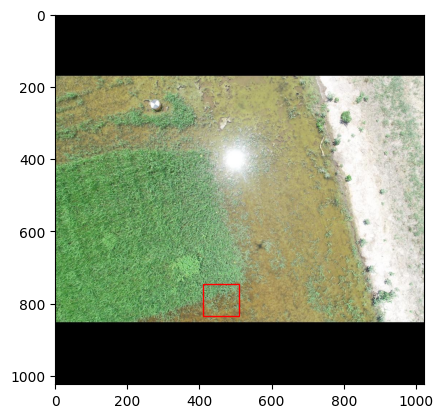

In [9]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html

imgarr = cv2.cvtColor(cv2.imread(img[0]), cv2.COLOR_BGR2RGB)
# class x_center y_center width height
bbox1 = [np.float64(x) for x in res[0].split(" ")]
bbox2 = [np.float64(x) for x in res[1].split(" ")]
bboxes = [bbox1, bbox2]

x_center = bbox1[1]
y_center = bbox1[2]
wd = bbox1[3]
ht = bbox1[4]
x, y, w, h = nxywh2xywh(x_center, y_center,wd, ht, imgarr.shape)
print(x, y, w, h)

newy =  y
low_left = (x,newy)
print(low_left, w, h)

# Create figure and axes
fig, ax = plt.subplots()
ax.imshow(imgarr)
rect = patches.Rectangle(low_left, w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

In [7]:
low_left


(362, 703)